In [7]:
import mplfinance as mpf
import pandas as pd

In [8]:
# * Get data from Stooq
data = pd.read_csv(
    "https://stooq.com/q/d/l/?s=btc.v&d1=20220101&d2=20221231&i=d",
    index_col=0,
    parse_dates=True,
)
data.index.name = "Date"
data.shape
data.head(3)
data.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2022-10-20,19194.39,19338.82,18906.09,19070.86,609782.352828
2022-10-21,19070.53,19247.68,18650.81,19155.91,707143.621006
2022-10-22,19155.61,19256.59,19114.93,19204.40,268301.884473
2022-10-23,19204.28,19596.05,19077.39,19540.98,343040.510597
2022-10-24,19542.19,19694.86,19161.30,19366.35,689738.102884


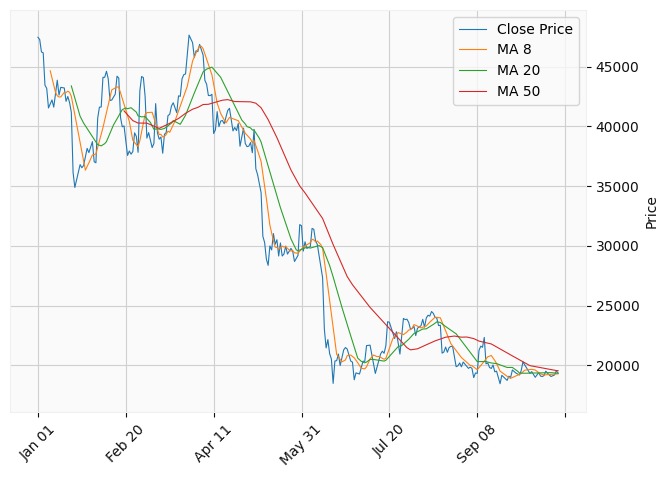

In [9]:
_, axes = mpf.plot(
    data, type="line", style="yahoo", mav=(8, 20, 50), returnfig=True
)

axes[0].legend([None] * 5)
handles = axes[0].get_legend().legendHandles
axes[0].legend(handles=handles, labels=list(["Close Price", "MA 8", "MA 20", "MA 50"]))

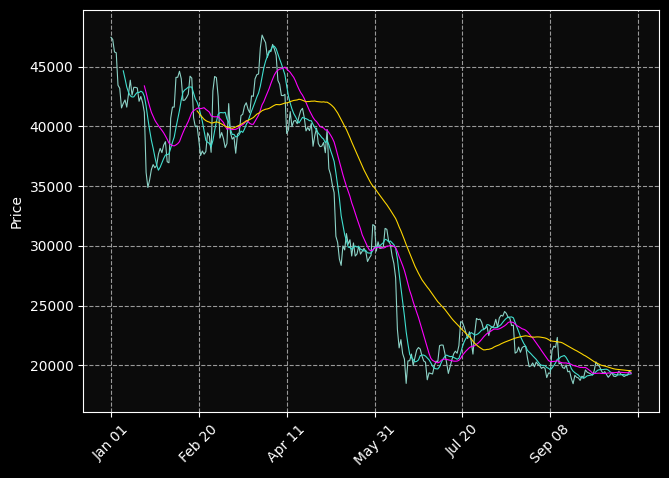

In [10]:
mpf.plot(data,type='line',mav=(8,20,50),style="nightclouds")

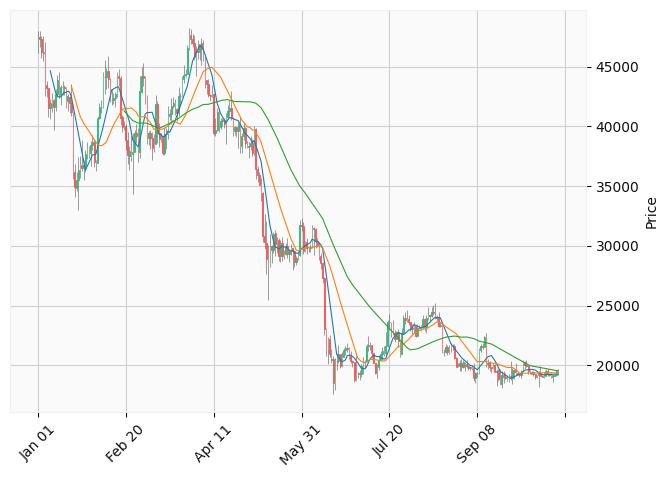

In [11]:
mpf.plot(data,type='candle',mav=(8,20,50),style="yahoo")

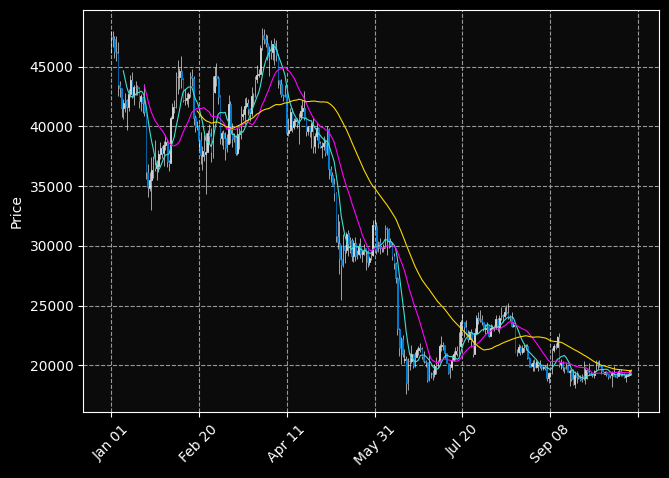

In [12]:
mpf.plot(data,type='candle',mav=(8,20,50),style="nightclouds")